# Covariances and correlations of stock returns 
*ELEC-C5211* - Johdatus signaalien tilastolliseen mallintamiseen /  Esa Ollila. 

The aim of the notebook: 
* illustrate how sample means, sample covariances and sample correlations can be computed using Python 
* how correlation can be visually inspected using scatter plots. 

We use returns of two commonly used stock market indices, NASDAQ-100 and SP-500. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd
np.random.seed(0)

In [2]:
sns.set_context("poster")
sns.set_style("whitegrid") 
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc("text",usetex=True)
rc('lines', linewidth=2.5)
rc('lines', markersize=3.5)

## Loading the data

In [13]:
NDX100 = pd.read_csv("NDX100.txt",sep="\t")
SP500 = pd.read_csv("SP500.txt", sep="\t")
dates = pd.to_datetime(NDX100["Date"].iloc[:-1],infer_datetime_format=True).dt.to_pydatetime()

NDX100_prices = NDX100["Close"].to_numpy()
SP500_prices = SP500["Close"].to_numpy()

Calculate the net returns of both stock indexes

In [14]:
NDX100_returns = NDX100_prices[1:]/NDX100_prices[:-1] - 1.0
SP100_returns = SP500_returns[1:]/SP500_returns[:-1] - 1.0
return_matrix = np.stack([NDX100_returns, SP100_returns],axis=0)

In [20]:
len(NDX100)

251

## Plotting The Data

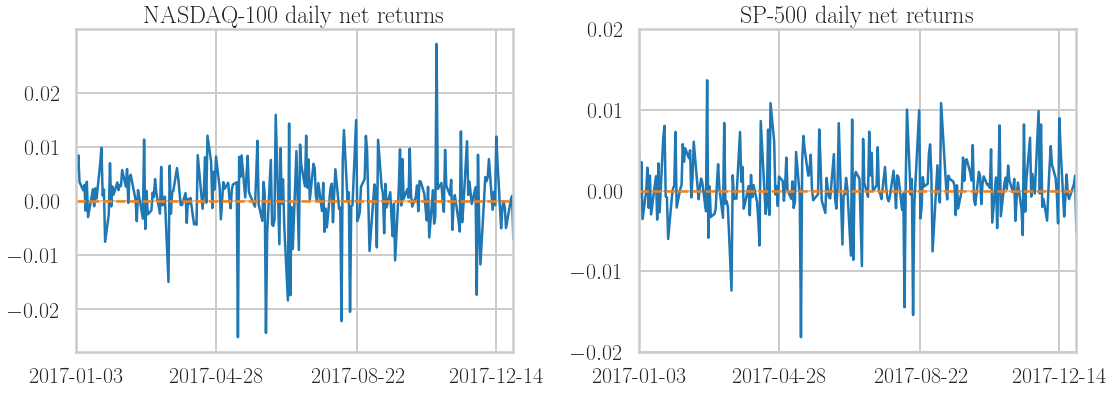

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
for i in range(2):
    ax[i].plot(dates, return_matrix[i,:])
    ax[i].set_xlim([dates.min(), dates.max()])
    ax[i].set_xticks(dates[np.arange(0,len(NDX100),80)])
    ax[i].plot(dates, np.zeros_like(dates),'--')
    ax[i].set_yticks(np.arange(-2,3)*0.01)       
ax[0].set_title("NASDAQ-100 daily net returns")
ax[1].set_title("SP-500 daily net returns")
fig.tight_layout()
plt.show()

**Q:** What does the plot tell you about the *risk* of the two market indices? 

## Computing the sample statistics
Let's compute the sample mean returns and sample covariance matrix (SCM) $\mathbf{S}$ and correlation matrix $\mathbf{R}$ of returns

In [50]:
mu = np.mean(net_return_matrix,axis=1)
sigma = np.cov(net_return_matrix)
rho =  np.corrcoef(net_return_matrix)
risk = np.sqrt(np.diag(sigma))
print(f"sample means = {mu[0]:.4f} {mu[1]: .4f}")
print(f"S = \n {sigma.round(7)}")
print(f"R = \n {rho.round(3)}")
print(f"risks = {risk[0]:.4f} {risk[1]:.4f}")

sample means = 0.0011  0.0007
S = 
 [[4.18e-05 2.16e-05]
 [2.16e-05 1.76e-05]]
R = 
 [[1.    0.798]
 [0.798 1.   ]]
risks = 0.0065 0.0042


**Q:** What can you infer about correlatedness of SP-500 and NASDAQ-100? 

## Scatter Plots
Scatter plots provide a useful visual inspection of correlation and covariance between two variables 

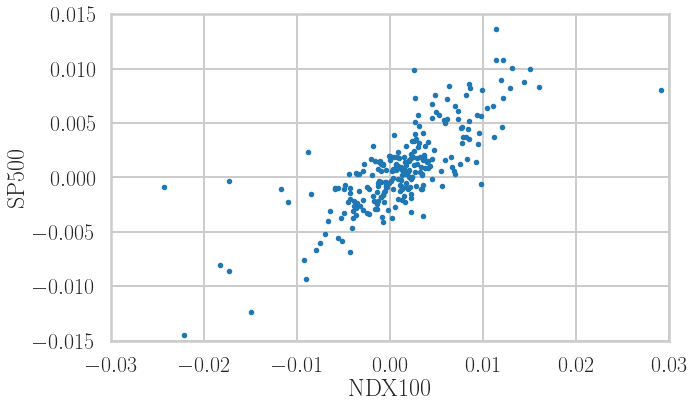

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(NDX100_net_returns, SP100_net_returns,)
plt.xlim([-0.03,0.03]), plt.ylim([-0.015,0.015])
plt.xlabel("NDX100"), plt.ylabel("SP500")
plt.show()

**Q:** Can you already infer the degree and type of correlation from this figure?